# Starting...

1. First, we are going to import all the libraries
2. After that, we are going to read all files and concatenate them

In [1]:
 import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from collections import Counter

In [52]:
flight_delay_2015 = pd.read_csv(f"/Users/maria.perensin/Documents/Data_Analytics_Bootcamp/Untitled Folder/cleaned_data/data_2015.csv")
flight_delay_2016 = pd.read_csv(f"/Users/maria.perensin/Documents/Data_Analytics_Bootcamp/Untitled Folder/cleaned_data/data_2016.csv")
flight_delay_2017 = pd.read_csv(f"/Users/maria.perensin/Documents/Data_Analytics_Bootcamp/Untitled Folder/cleaned_data/data_2017.csv")
flight_delay_2018 = pd.read_csv(f"/Users/maria.perensin/Documents/Data_Analytics_Bootcamp/Untitled Folder/cleaned_data/data_2018.csv")


In [57]:
flight_delay = pd.concat([flight_delay_2015,flight_delay_2016,flight_delay_2017,flight_delay_2018], ignore_index=True)

# Cleaning the final data base
1. Now we are going to check if any information needs to be added/ edited

In [60]:
flight_delay['HAS_DELAY'] = (flight_delay['DEP_DELAY'].apply(lambda x: 1 if x >0 else 0)) | (flight_delay['ARR_DELAY'].apply(lambda x: 1 if x >0 else 0))
flight_delay

,Unnamed: 0,FL_DATE,MONTH,OP_CARRIER,ORIGIN,DEST,ESTIMATED_DEP_TIME,DEP_TIME,DEP_DELAY,ESTIMATED_ARR_TIME,...,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,HAS_DELAY
0,0,2015-01-01,1,NK,MCO,FLL,2147,2143.0,-4.0,2250,...,0.0,63.0,62.0,177.0,NaN,NaN,NaN,NaN,NaN,0
1,1,2015-01-01,1,NK,LGA,FLL,1050,1104.0,14.0,1404,...,0.0,194.0,179.0,1076.0,NaN,NaN,NaN,NaN,NaN,1
2,2,2015-01-01,1,NK,FLL,MCO,700,712.0,12.0,757,...,0.0,57.0,61.0,177.0,0.0,0.0,16.0,0.0,0.0,1
3,3,2015-01-01,1,NK,IAH,LAS,2240,2251.0,11.0,2356,...,0.0,196.0,176.0,1222.0,NaN,NaN,NaN,NaN,NaN,1
4,4,2015-01-01,1,NK,IAH,ORD,623,620.0,-3.0,855,...,0.0,152.0,140.0,925.0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24324799,7213441,2018-12-31,12,AA,DCA,CLT,1534,1530.0,-4.0,1714,...,0.0,100.0,99.0,331.0,NaN,NaN,NaN,NaN,NaN,0
24324800,7213442,2018-12-31,12,AA,CLT,DFW,1751,1757.0,6.0,1952,...,0.0,181.0,176.0,936.0,NaN,NaN,NaN,NaN,NaN,1
24324801,7213443,2018-12-31,12,AA,CLT,MEM,2015,2010.0,-5.0,2107,...,0.0,112.0,128.0,511.0,NaN,NaN,NaN,NaN,NaN,1
24324802,7213444,2018-12-31,12,AA,CLT,RDU,1300,1323.0,23.0,1350,...,0.0,50.0,41.0,130.0,NaN,NaN,NaN,NaN,NaN,1


Due to the massive number of rows, we are going to pick a sample with 50000 cases.

In [61]:
flight_delay_sample = flight_delay.sample(n=50000)

In [79]:
flight_delay_sample

,Unnamed: 0,FL_DATE,MONTH,OP_CARRIER,ORIGIN,DEST,ESTIMATED_DEP_TIME,DEP_TIME,DEP_DELAY,ESTIMATED_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,HAS_DELAY
9260169,3441090,2016-08-10,8,HA,HNL,OGG,858,852.0,-6.0,938,932.0,-6.0,0.0,40.0,40.0,100.0,NaN,NaN,0
23687091,6575733,2018-11-28,11,AS,SEA,SMF,1545,1540.0,-5.0,1742,1739.0,-3.0,0.0,117.0,119.0,605.0,NaN,NaN,0
11487683,50946,2017-01-04,1,EV,LGA,CLE,1100,1044.0,-16.0,1258,1214.0,-44.0,0.0,118.0,90.0,419.0,NaN,NaN,0
9163750,3344671,2016-08-04,8,WN,LAS,IND,1640,1638.0,-2.0,2310,2306.0,-4.0,0.0,210.0,208.0,1590.0,NaN,NaN,0
15283593,3846856,2017-09-03,9,AS,LAX,ANC,2335,2331.0,-4.0,409,319.0,-50.0,0.0,334.0,288.0,2345.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492496,1492496,2015-04-06,4,AS,YAK,CDV,1141,1119.0,-22.0,1227,1217.0,-10.0,0.0,46.0,58.0,213.0,NaN,NaN,0
16914409,5477672,2017-12-18,12,WN,SJC,SAN,1445,1455.0,10.0,1605,1603.0,-2.0,0.0,80.0,68.0,417.0,NaN,NaN,1
2047472,2047472,2015-05-10,5,DL,SNA,SLC,1638,1636.0,-2.0,1925,1923.0,-2.0,0.0,107.0,107.0,588.0,NaN,NaN,0
19304002,2192644,2018-04-25,4,WN,TPA,SDF,1020,1019.0,-1.0,1225,1217.0,-8.0,0.0,125.0,118.0,727.0,NaN,NaN,0


In [91]:
flight_delay_sample['CANCELLED'].value_counts().unique()

array([49265,   735])

# Getting ready with the analysis

Now, we'll distinguish at what period of the day each flight left its origin

In [92]:
flight_delay_sample['DAY_PERIOD'] = (flight_delay_sample['DEP_TIME'].apply(lambda x: 'morning' if x <1200 else 'night/afternoon'))


In [93]:
flight_delay_sample.head()

,Unnamed: 0,FL_DATE,MONTH,OP_CARRIER,ORIGIN,DEST,ESTIMATED_DEP_TIME,DEP_TIME,DEP_DELAY,ESTIMATED_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,HAS_DELAY,DAY_PERIOD
9260169,3441090,2016-08-10,8,HA,HNL,OGG,858,852.0,-6.0,938,932.0,-6.0,0.0,40.0,40.0,100.0,NaN,NaN,0,morning
23687091,6575733,2018-11-28,11,AS,SEA,SMF,1545,1540.0,-5.0,1742,1739.0,-3.0,0.0,117.0,119.0,605.0,NaN,NaN,0,night/afternoon
11487683,50946,2017-01-04,1,EV,LGA,CLE,1100,1044.0,-16.0,1258,1214.0,-44.0,0.0,118.0,90.0,419.0,NaN,NaN,0,morning
9163750,3344671,2016-08-04,8,WN,LAS,IND,1640,1638.0,-2.0,2310,2306.0,-4.0,0.0,210.0,208.0,1590.0,NaN,NaN,0,night/afternoon
15283593,3846856,2017-09-03,9,AS,LAX,ANC,2335,2331.0,-4.0,409,319.0,-50.0,0.0,334.0,288.0,2345.0,NaN,NaN,0,night/afternoon


In [131]:
delay_dayperiod

COUNT_TOTAL
HAS_DELAY DAY_PERIOD                  
0         morning                13141
          night/afternoon        14465
1         morning                 7343
          night/afternoon        15051

<AxesSubplot:xlabel='COUNT_TOTAL', ylabel='DAY_PERIOD'>

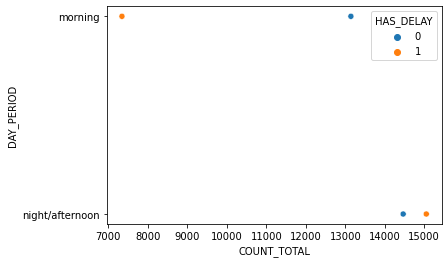

In [134]:
delay_dayperiod = flight_delay_sample.groupby(['HAS_DELAY', 'DAY_PERIOD']).agg(COUNT_TOTAL=('HAS_DELAY','count'))
sns.scatterplot(data=delay_dayperiod,
                x='COUNT_TOTAL',
                y='DAY_PERIOD',
               hue='HAS_DELAY')

As per views above, delays seem to happen more often during night/ afternoon. However, we don't know yet when longer delays tend to happen. 

In [213]:
morning_dep_delay = (flight_delay_sample["DAY_PERIOD"]=="morning")

flight_delay_sample[["DEP_DELAY"]].loc[morning_dep_delay].describe()

,DEP_DELAY
count,20478.000000
mean,3.464303
std,38.537362
min,-23.000000
25%,-6.000000
50%,-3.000000
75%,0.000000
max,1368.000000


In [214]:
night_dep_delay = (flight_delay_sample["DAY_PERIOD"]=="night/afternoon")

flight_delay_sample[["DEP_DELAY"]].loc[night_dep_delay].describe()

,DEP_DELAY
count,28794.000000
mean,14.060325
std,44.850306
min,-41.000000
25%,-5.000000
50%,-1.000000
75%,14.000000
max,1127.000000


<AxesSubplot:>

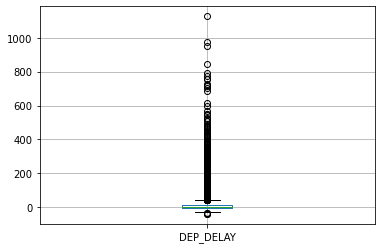

In [215]:
flight_delay_sample[["DEP_DELAY"]].loc[night_dep_delay].boxplot()

<AxesSubplot:>

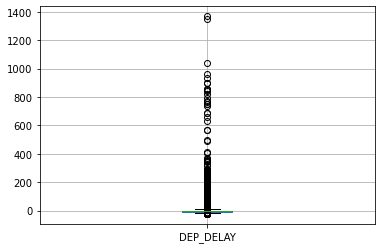

In [216]:
flight_delay_sample[["DEP_DELAY"]].loc[morning_dep_delay].boxplot()

By running the analysis above, we can conclude that not only delays happen more often in the period of afternoon/ night, but they also are longer in this period. As we can see just 25% of the morning flights truly present delays. While 25% of night flights tend to delay more than 14 minutes.

<AxesSubplot:xlabel='MONTH', ylabel='HAS_DELAY'>

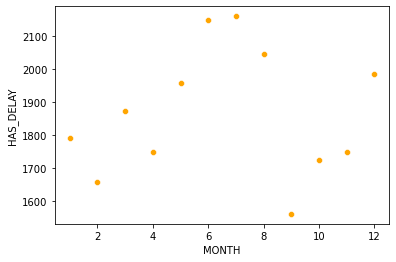

In [240]:
has_delay = flight_delay_sample["HAS_DELAY"]== 1

monthly_delay = flight_delay_sample.loc[has_delay]

monthly_delay = monthly_delay.groupby("MONTH")[["HAS_DELAY"]].count()


sns.scatterplot(data=monthly_delay,
               x='MONTH',
               y='HAS_DELAY',
               color = 'orange')

As per the view above, we can confirm departure delays happen more frequently in the period of June to August, during vacations period in the US.

In [344]:
destiny = flight_delay_sample.groupby("DEST")[["ARR_DELAY"]].count()
destiny.sort_values(by='ARR_DELAY', ascending=False)

,ARR_DELAY
DEST,
ATL,3065
ORD,2303
DEN,1901
DFW,1840
LAX,1703
...,...
BFF,1
SLN,1
HTS,1


In [346]:
destiny1 = flight_delay_sample.groupby("ORIGIN")[["DEP_DELAY"]].count()
destiny1 = destiny1.sort_values(by='DEP_DELAY', ascending=False)

In [348]:
destiny1.head(15)

,DEP_DELAY
ORIGIN,
ATL,3015
ORD,2234
DEN,1832
DFW,1811
LAX,1756
SFO,1428
PHX,1335
LAS,1313
IAH,1256


In [382]:
perfect_destination = ((((flight_delay_sample["MONTH"]==2)
                        |(flight_delay_sample["MONTH"]==9)
                  |(flight_delay_sample["MONTH"]==10))) & (flight_delay_sample["DEST"] != "ATL")& 
                                                        (flight_delay_sample["DEST"] != "ORD") &
(flight_delay_sample["DAY_PERIOD"] == 'morning'))

In [384]:
prop_destination = pd.DataFrame(flight_delay_sample.loc[perfect_destination])

In [386]:
prop_destination = prop_destination.drop(columns = ["ESTIMATED_ARR_TIME","ARR_TIME","ARR_DELAY","CANCELLED","DISTANCE"])

In [407]:
prop_destination["DEP_DELAY"].describe()

count   4308.000
mean       2.412
std       40.200
min      -21.000
25%       -6.000
50%       -3.000
75%        0.000
max     1368.000
Name: DEP_DELAY, dtype: float64

In [398]:
X1 = prop_destination[["ESTIMATED_DEP_TIME"]]
y1 = prop_destination.DEP_TIME

In [399]:
model1 = LinearRegression()
model1.fit(X1,y1)
departure_predicted1 = model1.predict(X1)

In [400]:
prop_destination["PREDICTED_DEPARTURE"] = departure_predicted1

In [401]:
prop_destination["DEPARTURE_DIFERENCE"] = prop_destination["PREDICTED_DEPARTURE"] - prop_destination["DEP_TIME"] 

In [410]:
prop_destination.head()

,FL_DATE,MONTH,OP_CARRIER,ORIGIN,DEST,ESTIMATED_DEP_TIME,DEP_TIME,DEP_DELAY,HAS_DELAY,DAY_PERIOD,PREDICTED_DEPARTURE,DEPARTURE_DIFERENCE
4763465,2015-10-24,10,WN,SEA,DEN,940,933.000,-7.000,0,morning,894.616,-38.384
10019083,2016-09-28,9,WN,PHX,AUS,715,715.000,0.000,0,morning,750.270,35.270
10521558,2016-10-31,10,DL,GRR,MSP,720,717.000,-3.000,0,morning,753.477,36.477
10234289,2016-10-12,10,UA,DTW,DEN,750,805.000,15.000,1,morning,772.724,-32.276
18020510,2018-02-19,2,WN,OAK,LAS,930,926.000,-4.000,0,morning,888.201,-37.799


In [403]:
pd.options.display.float_format = '{:.3f}'.format

In [404]:
prop_destination["DEPARTURE_DIFERENCE"].describe()

count   4308.000
mean       0.000
std      147.638
min     -386.918
25%      -72.021
50%       -7.330
75%       46.322
max     1803.960
Name: DEPARTURE_DIFERENCE, dtype: float64

In [ ]:
X2 = prop_destination[["DEP_TIME"]]
y2 = prop_destination.DEP_TIME

In [408]:
from sklearn.metrics import r2_score

In [411]:
r2_score(y1, departure_predicted1)

0.48683424936942565

In [338]:
flight_delay_sample.head(15)

,FL_DATE,MONTH,OP_CARRIER,ORIGIN,DEST,ESTIMATED_DEP_TIME,DEP_TIME,DEP_DELAY,ESTIMATED_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE,HAS_DELAY,DAY_PERIOD
9260169,2016-08-10,8,HA,HNL,OGG,858,852.000,-6.000,938,932.000,-6.000,0.000,100.000,0,morning
23687091,2018-11-28,11,AS,SEA,SMF,1545,1540.000,-5.000,1742,1739.000,-3.000,0.000,605.000,0,night/afternoon
11487683,2017-01-04,1,EV,LGA,CLE,1100,1044.000,-16.000,1258,1214.000,-44.000,0.000,419.000,0,morning
9163750,2016-08-04,8,WN,LAS,IND,1640,1638.000,-2.000,2310,2306.000,-4.000,0.000,1590.000,0,night/afternoon
15283593,2017-09-03,9,AS,LAX,ANC,2335,2331.000,-4.000,409,319.000,-50.000,0.000,2345.000,0,night/afternoon
23091191,2018-10-29,10,AA,JFK,CLT,1700,1657.000,-3.000,1909,1843.000,-26.000,0.000,541.000,0,night/afternoon
7658763,2016-05-02,5,OO,MSN,MSP,1930,1924.000,-6.000,2041,2031.000,-10.000,0.000,228.000,0,night/afternoon
1554958,2015-04-10,4,OO,ORD,XNA,935,929.000,-6.000,1124,1128.000,4.000,0.000,522.000,1,morning
17576061,2018-01-26,1,B6,BOS,JFK,758,750.000,-8.000,914,901.000,-13.000,0.000,187.000,0,morning
21528324,2018-08-11,8,DL,ELP,ATL,1345,1617.000,152.000,1903,2107.000,124.000,0.000,1282.000,1,night/afternoon


In [277]:
carrier_status = pd.DataFrame(flight_delay_sample.groupby("OP_CARRIER")[["HAS_DELAY"]].count())

In [368]:
common_destiny = (((flight_delay_sample["MONTH"]==6) |(flight_delay_sample["MONTH"]==7)
                  |(flight_delay_sample["MONTH"]==8)) & ((flight_delay_sample["DEST"] == "LAX")| 
                                                        (flight_delay_sample["DEST"] == "SAN")|
                                                        (flight_delay_sample["DEST"] == "SFO")))

pop_destiny = pd.DataFrame(flight_delay_sample.loc[common_destiny])

In [301]:
pop_destiny = pop_destiny.dropna()

In [418]:
pop_destiny.corr()

,MONTH,ESTIMATED_DEP_TIME,DEP_TIME,DEP_DELAY,ESTIMATED_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE,HAS_DELAY,PREDICTED_DEPARTURE,DEPARTURE_DIFERENCE
MONTH,1.000,-0.010,-0.023,-0.004,-0.039,-0.046,-0.010,NaN,-0.032,-0.030,-0.010,0.050
ESTIMATED_DEP_TIME,-0.010,1.000,0.963,0.129,0.709,0.569,0.129,NaN,0.050,0.168,1.000,0.000
DEP_TIME,-0.023,0.963,1.000,0.128,0.707,0.584,0.129,NaN,0.056,0.203,0.963,-0.271
DEP_DELAY,-0.004,0.129,0.128,1.000,0.088,0.010,0.967,NaN,0.053,0.338,0.129,-0.016
ESTIMATED_ARR_TIME,-0.039,0.709,0.707,0.088,1.000,0.822,0.089,NaN,0.062,0.187,0.709,-0.091
ARR_TIME,-0.046,0.569,0.584,0.010,0.822,1.000,0.007,NaN,0.034,0.153,0.569,-0.134
ARR_DELAY,-0.010,0.129,0.129,0.967,0.089,0.007,1.000,NaN,0.013,0.401,0.129,-0.018
CANCELLED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DISTANCE,-0.032,0.050,0.056,0.053,0.062,0.034,0.013,NaN,1.000,0.049,0.050,-0.029
HAS_DELAY,-0.030,0.168,0.203,0.338,0.187,0.153,0.401,NaN,0.049,1.000,0.168,-0.152


In [372]:
X = pop_destiny[["ESTIMATED_DEP_TIME"]]
y = pop_destiny.DEP_TIME

In [373]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [374]:
departure_predicted = model.predict(X)

In [375]:
pop_destiny ["PREDICTED_DEPARTURE"] = departure_predicted

In [376]:
pop_destiny["DEPARTURE_DIFERENCE"] = pop_destiny["PREDICTED_DEPARTURE"] - pop_destiny["DEP_TIME"] 

In [377]:
pop_destiny = pop_destiny.drop(columns = ["FL_DATE"])

In [378]:
pop_destiny.head(19)

,MONTH,OP_CARRIER,ORIGIN,DEST,ESTIMATED_DEP_TIME,DEP_TIME,DEP_DELAY,ESTIMATED_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DISTANCE,HAS_DELAY,DAY_PERIOD,PREDICTED_DEPARTURE,DEPARTURE_DIFERENCE
8948518,7,DL,MCO,LAX,1832,1836.000,4.000,2050,2045.000,-5.000,0.000,2218.000,1,night/afternoon,1838.826,2.826
2810935,6,WN,MDW,LAX,820,820.000,0.000,1040,1031.000,-9.000,0.000,1750.000,0,morning,836.659,16.659
14493445,7,OO,LAX,SAN,1811,1825.000,14.000,1910,1917.000,7.000,0.000,109.000,1,night/afternoon,1818.030,-6.970
3551345,8,AS,PDX,LAX,1715,1758.000,43.000,1944,2043.000,59.000,0.000,834.000,1,night/afternoon,1722.963,-35.037
21830333,8,UA,EWR,LAX,1530,1534.000,4.000,1820,1822.000,2.000,0.000,2454.000,1,night/afternoon,1539.760,5.760
2835902,6,VX,AUS,SFO,1750,1802.000,12.000,1925,1931.000,6.000,0.000,1504.000,1,night/afternoon,1757.623,-44.377
9583767,8,OO,PSC,SFO,1400,1351.000,-9.000,1600,1551.000,-9.000,0.000,620.000,0,night/afternoon,1411.024,60.024
2431971,6,DL,SLC,LAX,2005,2005.000,0.000,2105,2142.000,37.000,0.000,590.000,1,night/afternoon,2010.145,5.145
14104860,6,WN,SMF,SAN,955,1005.000,10.000,1125,1136.000,11.000,0.000,480.000,1,morning,970.347,-34.653
20202226,6,WN,STL,SAN,2115,2305.000,110.000,2300,40.000,100.000,0.000,1557.000,1,night/afternoon,2119.077,-185.923


In [415]:
pop_destiny["DEP_DELAY"].describe()

count   1028.000
mean      15.446
std       54.346
min      -26.000
25%       -4.000
50%       -1.000
75%       13.000
max      932.000
Name: DEP_DELAY, dtype: float64

In [380]:
pd.options.display.float_format = '{:.3f}'.format


In [381]:
pop_destiny["DEPARTURE_DIFERENCE"].describe()

count   1028.000
mean      -0.000
std      141.353
min     -592.203
25%       -3.943
50%       10.833
75%       19.578
max     2204.930
Name: DEPARTURE_DIFERENCE, dtype: float64

In [412]:
r2_score(y, departure_predicted)

0.9267485817987082